In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Historical Product Demand.csv')

In [4]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
data.shape

(1048575, 5)

In [6]:
data.Date = pd.to_datetime(data.Date)
data.Date.min(), data.Date.max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [7]:
data.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,1000
freq,16936,764447,481099,2075,112682
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN


In [8]:
data.Order_Demand = data.Order_Demand.str.replace('(', '')
data.Order_Demand = data.Order_Demand.str.replace(')', '')

In [9]:
data.Order_Demand = data.Order_Demand.astype(float)

In [10]:
data.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [11]:
data[['Product_Code', 'Warehouse', 'Product_Category']].describe()

,Product_Code,Warehouse,Product_Category
count,1048575,1048575,1048575
unique,2160,4,33
top,Product_1359,Whse_J,Category_019
freq,16936,764447,481099


In [12]:
data.isna().sum()/data.shape[0]

Product_Code        0.000000
Warehouse           0.000000
Product_Category    0.000000
Date                0.010718
Order_Demand        0.000000
dtype: float64

In [13]:
data = data[data['Date'].notnull()]
data.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [14]:
data.groupby('Product_Category')['Order_Demand'].agg('sum').reset_index().sort_values(by = 'Order_Demand', ascending = False).head()

,Product_Category,Order_Demand
18,Category_019,4.240159e+09
5,Category_006,4.055713e+08
4,Category_005,1.996745e+08
6,Category_007,1.286915e+08
27,Category_028,4.905535e+07


<AxesSubplot:xlabel='Product_Category'>

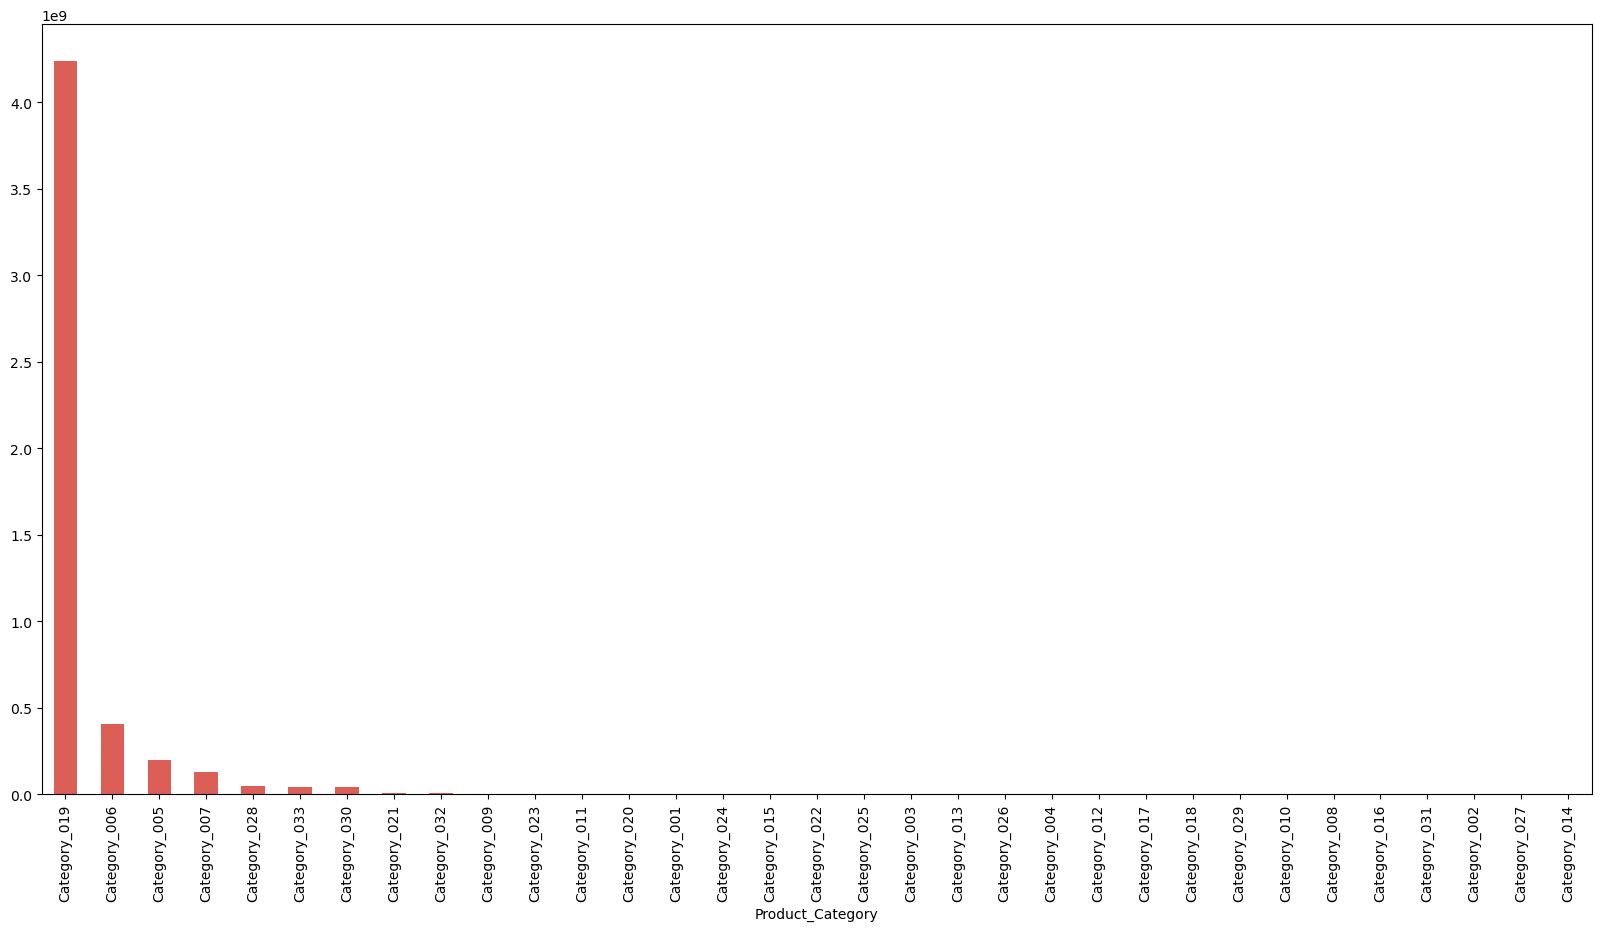

In [15]:
sns.set_palette(sns.color_palette('hls', 8))
plt.figure(figsize = (20, 10))
data.groupby('Product_Category')['Order_Demand'].agg('sum').sort_values(ascending = False).plot(kind = 'bar')

005, 006, 007 and 019 are major product categories

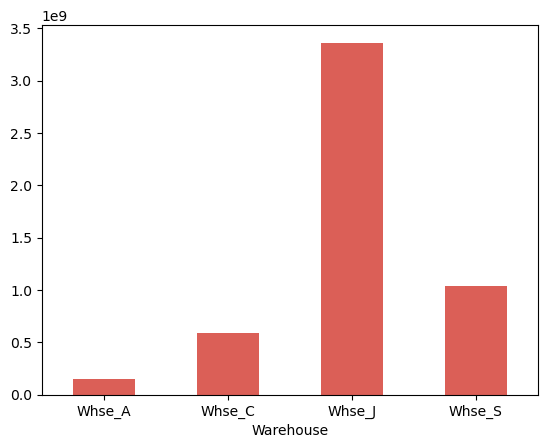

In [16]:
data.groupby('Warehouse')['Order_Demand'].agg('sum').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Seasonality in the data

In [17]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [18]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

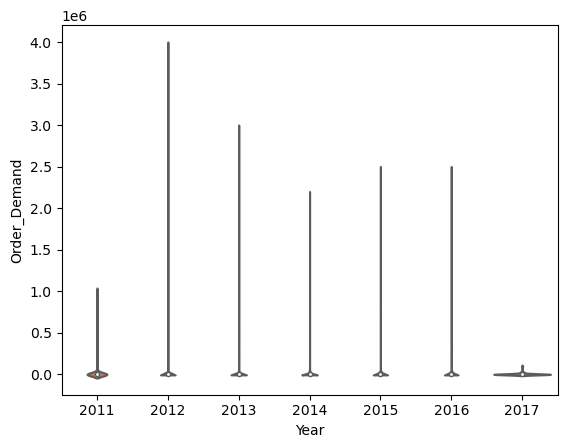

In [19]:
sns.violinplot(x = "Year", y = 'Order_Demand', data = data)
plt.show()

<AxesSubplot:xlabel='Year,Month'>

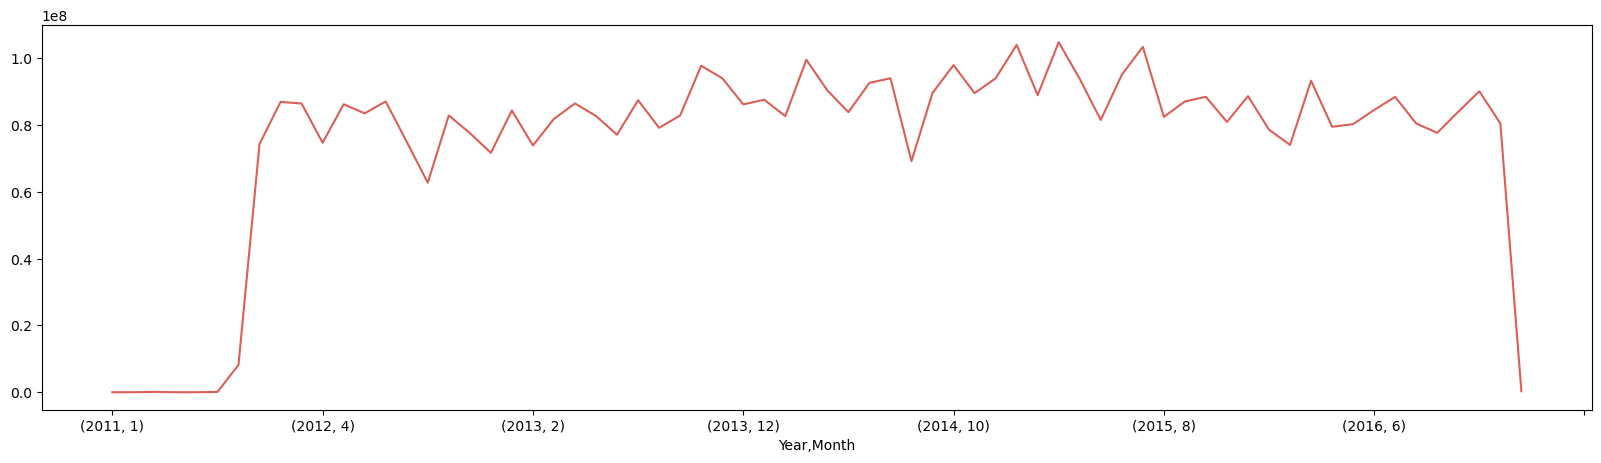

In [20]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby(['Year','Month'])['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year'>

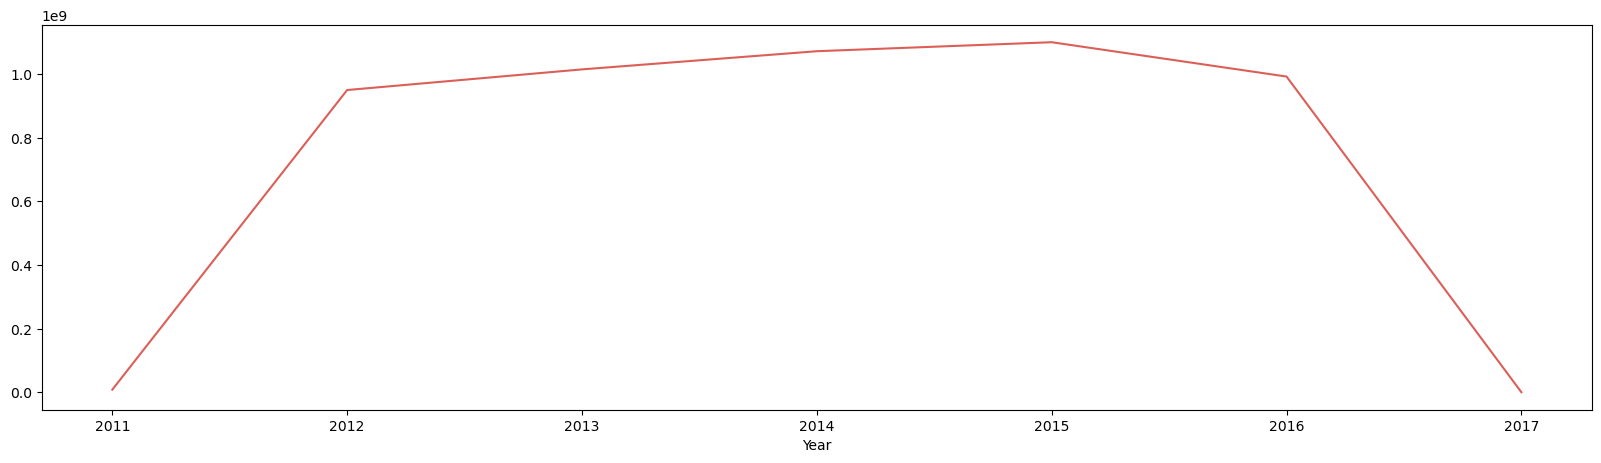

In [21]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby('Year')['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

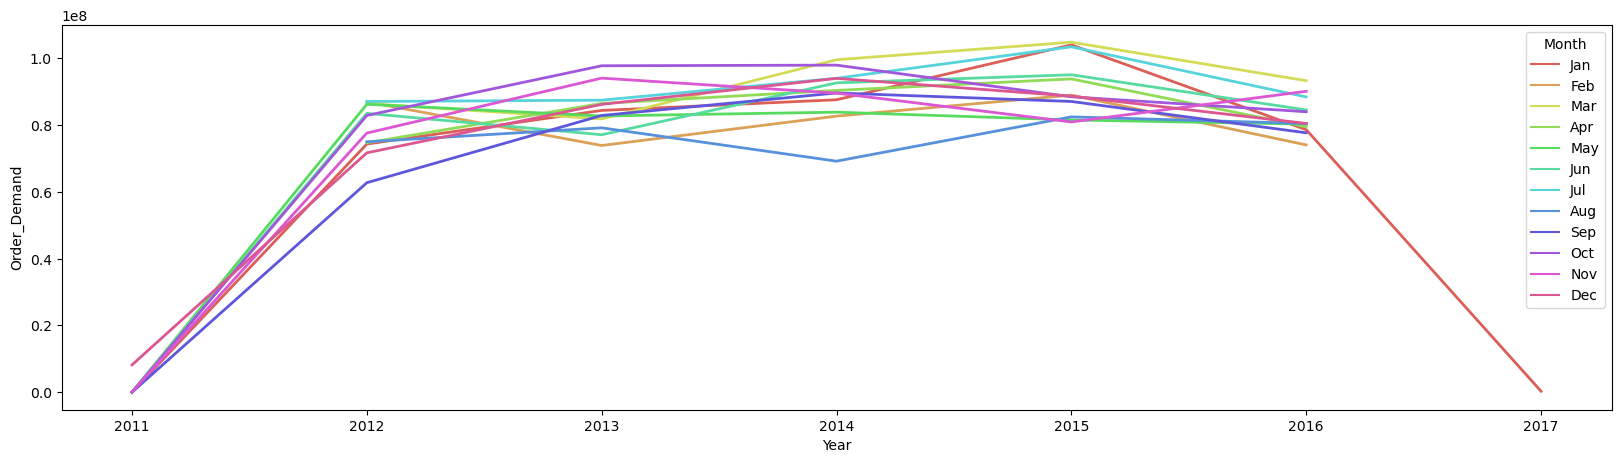

In [22]:
plt.figure(figsize = (20, 5))
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year', 'Month'], ascending = False)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 12))
sns.lineplot(data=temp, x="Year", y="Order_Demand", hue="Month", markers = True, lw = 2, hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


<AxesSubplot:xlabel='Month', ylabel='Order_Demand'>

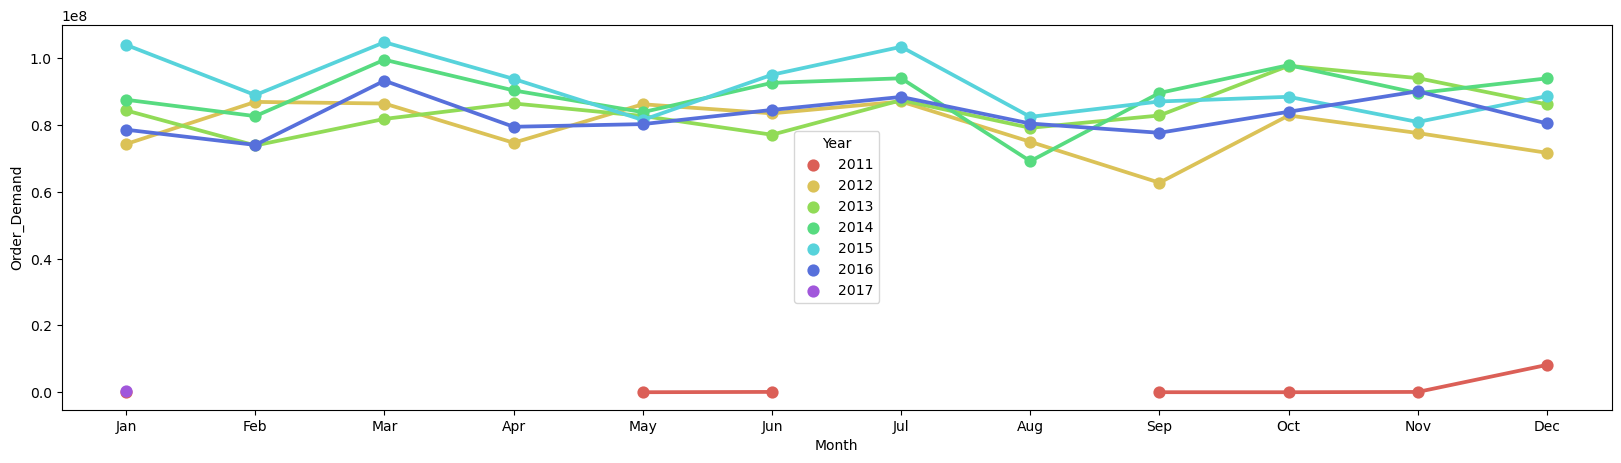

In [23]:
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Month'], ascending = True)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Month", y="Order_Demand", hue="Year")

In [24]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

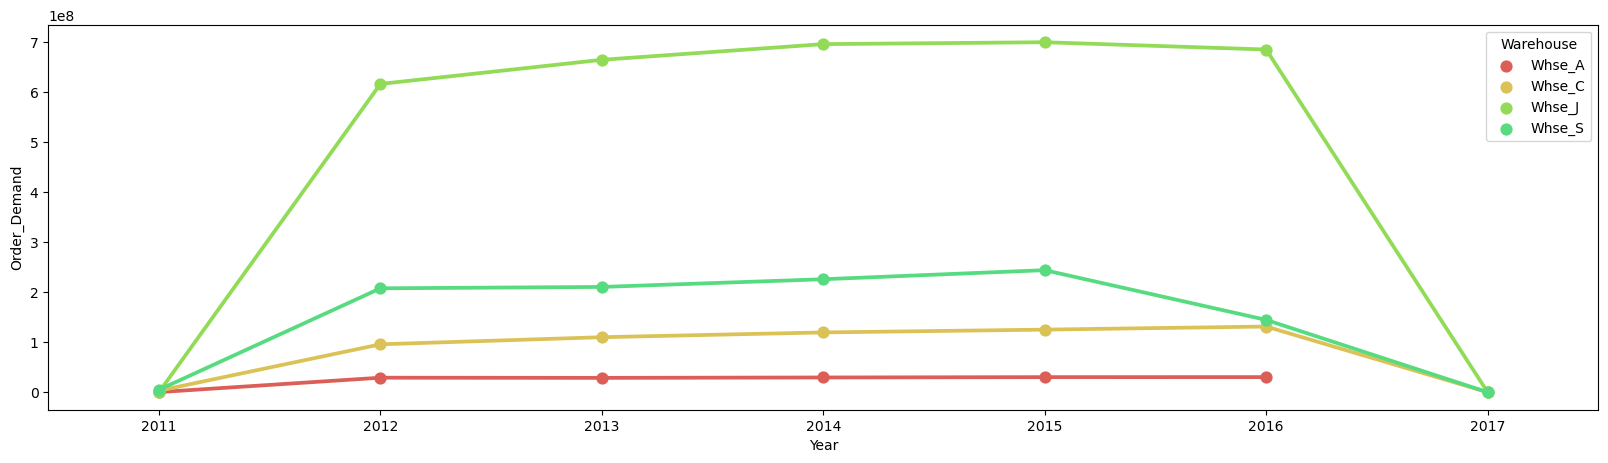

In [25]:
temp = data.groupby(['Year', 'Warehouse'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year'], ascending = True)
#temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Year", y="Order_Demand", hue="Warehouse")

In [26]:
#Excluding all data from 2017 and 2011 to ensure only years with complete data are reflected

data = data[data['Year'] != 2017]
data = data[data['Year'] != 2011]

In [27]:
data['Year'].value_counts()

2013    218298
2014    216404
2015    209661
2012    203635
2016    188645
Name: Year, dtype: int64

<AxesSubplot:xlabel='Month'>

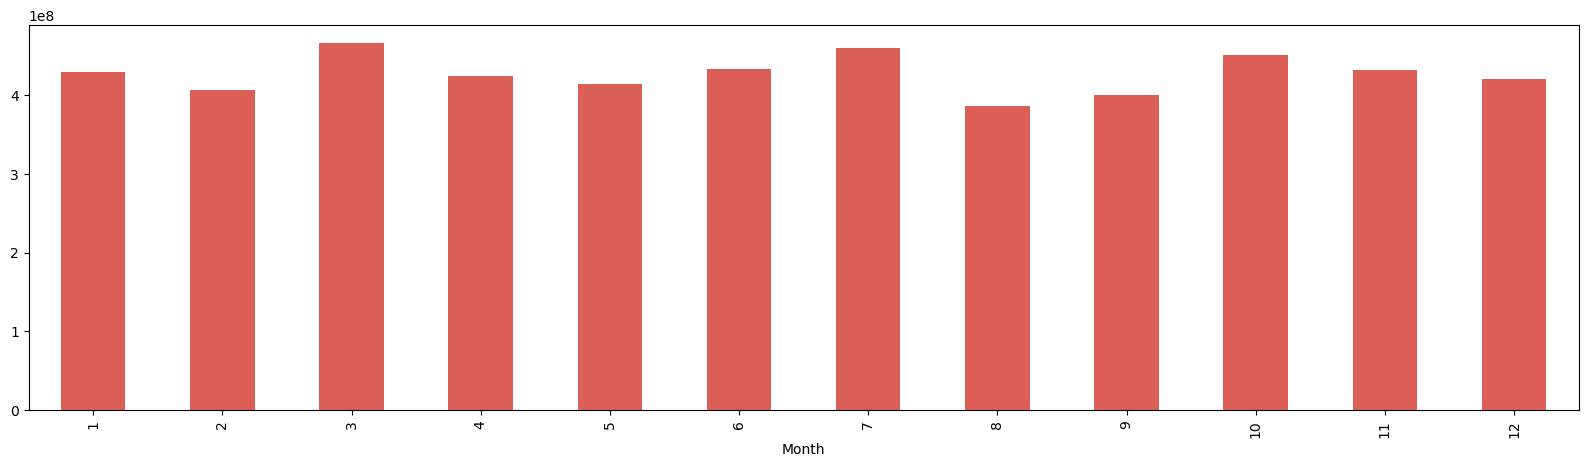

In [28]:
plt.figure(figsize = (20, 5))
data.groupby('Month')['Order_Demand'].agg('sum').plot(kind = 'bar')

In [29]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Warehouse', ylabel='Order_Demand'>

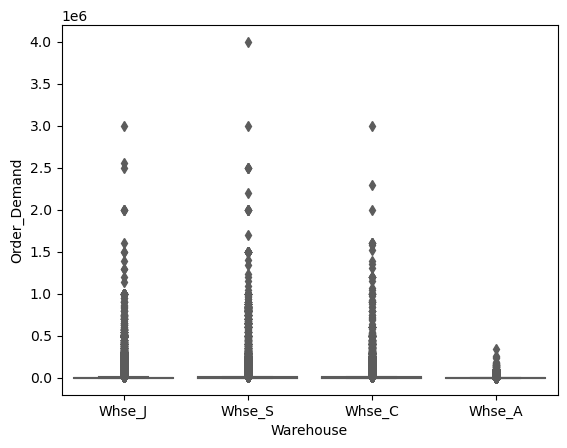

In [30]:
sns.boxplot(data = data, x = 'Warehouse', y  = 'Order_Demand')

<AxesSubplot:xlabel='Warehouse', ylabel='Log_Order_Demand'>

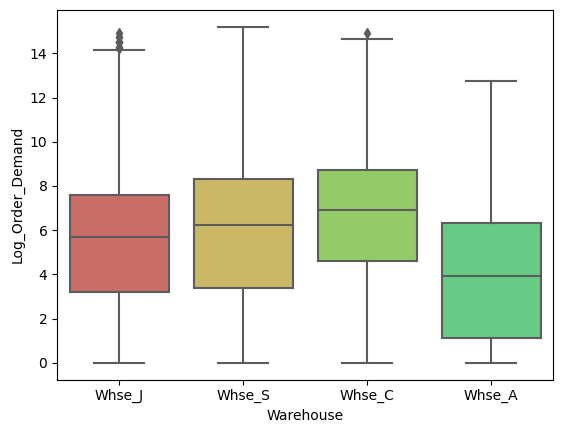

In [31]:
#Log transform of the order demand
temp = data.copy()
temp['Log_Order_Demand'] = np.log(temp['Order_Demand'])
sns.boxplot(data = temp, x = 'Warehouse', y  = 'Log_Order_Demand')

In [32]:
from statsmodels.tsa.seasonal import DecomposeResult

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
temp = None

month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None
decompose = seasonal_decompose(month_avg_sales, model = 'additive')
fig = decompose.plot()
fig.set_size_inches((16, 9))
#plt.show()

In [ ]:
month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None
decompose = seasonal_decompose(month_avg_sales, model = 'multiplicative')
fig = decompose.plot()
fig.set_size_inches((16, 9))

In [35]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

In [38]:
data[['Product_Category', 'Warehouse', 'Order_Demand']].groupby(['Product_Category', 'Warehouse']).sum().reset_index().sort_values(by = ['Order_Demand']).pivot(index = 'Product_Category', columns = 'Warehouse', values = 'Order_Demand')

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
Product_Category,,,,
Category_001,1749.0,59909.0,1.622259e+06,72530.0
Category_002,NaN,NaN,NaN,628.0
Category_003,131499.0,NaN,3.926700e+04,220476.0
Category_004,NaN,NaN,NaN,96266.0
Category_005,1124300.0,12512000.0,1.289089e+08,56444950.0
Category_006,11591923.0,33051500.0,3.185602e+08,41807193.0
Category_007,2837624.0,7162843.0,1.121454e+08,6514672.0
Category_008,1903.0,317.0,1.534800e+04,NaN
Category_009,919881.0,250931.0,4.464670e+05,2163285.0


### Forecasting with the data

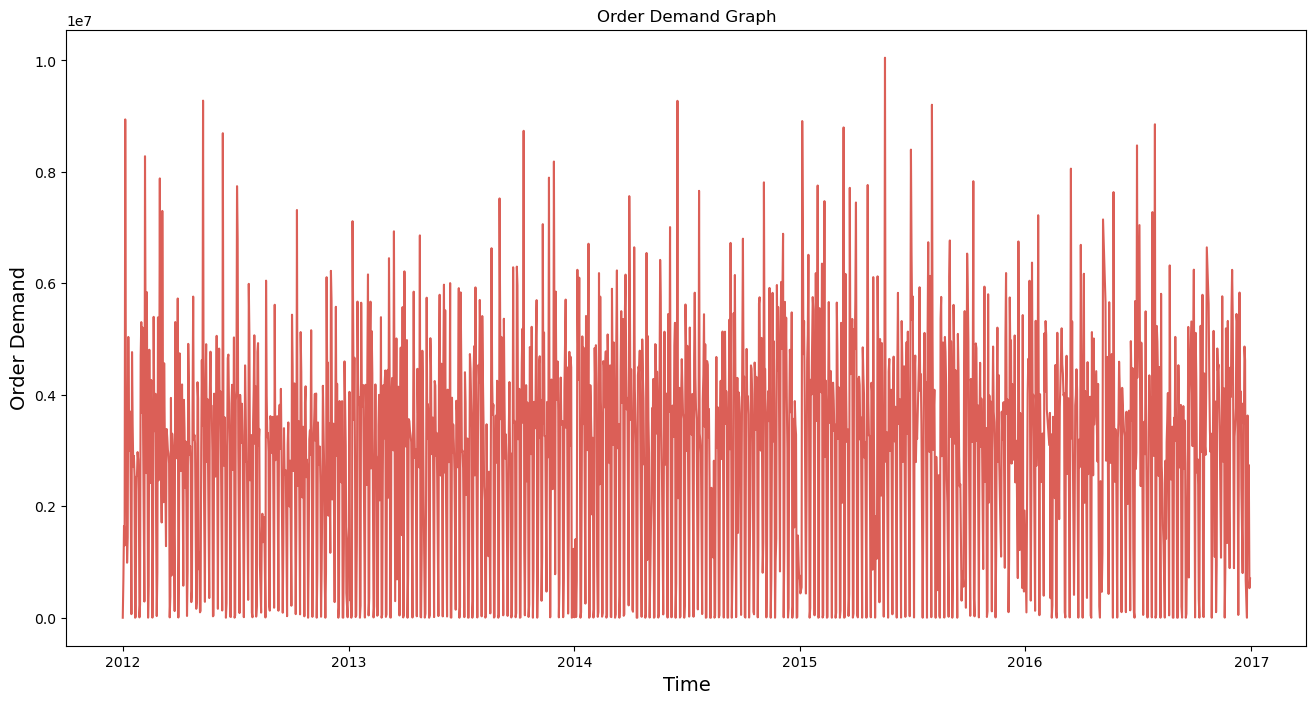

In [45]:
df = data.groupby('Date')['Order_Demand'].sum().reset_index()

plt.figure(figsize = (16, 8))
plt.title("Order Demand Graph")
plt.plot(df['Date'], df['Order_Demand'])
plt.xlabel('Time', fontsize = 14,)
plt.ylabel('Order Demand', fontsize = 14,)
plt.show()

In [53]:
#from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_blobs
#from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [48]:
df.filter(['Order_Demand']).values

array([[2.000000e+00],
       [6.802770e+05],
       [1.645257e+06],
       ...,
       [2.740302e+06],
       [5.304870e+05],
       [7.029500e+05]])

In [47]:
df.shape

(1681, 2)

In [42]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')